<a href="https://colab.research.google.com/github/xy4/Learn-python-the-hard-way/blob/master/SimPy_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SimPy Demo
This document is to show how to use Python do DES with SimPy

The first step is to import SimPy package and numpy package. 

In [0]:
!pip install simpy

In [0]:
import simpy
import numpy as np
import matplotlib.pyplot as plt



Parameters



In [0]:
k = 1  # Number of servers
mu = 2     # service rate
lmd = 2       # arrival rate
theta = 1  # abandon rate
T = 5  # Simulation time

Arrivals

In [0]:
def arr(env, servicearea, mu, lmd, theta,wait, t, cn):
    i = 0
    while True:
        yield env.timeout(-np.log(np.random.uniform(0,1))/lmd)  # arrival time
        i += 1  # customer id
        env.process(ser(env, 'Customer %d' % i, servicearea, theta, mu, wait, t, cn))
    

Services

In [0]:
def ser(env, name, servicearea, theta, mu, wait, t, cn):
    arrive = env.now    # arrival time = current time
    cn.append(cn[-1] + 1)  # customer number in queue increased by 1
    t.append(env.now)  # record the arrival time of current customer
    print('%s arrives at %.2f.' % (name, arrive))
    # after arrives    
    patience = -np.log(np.random.uniform(0,1))/theta  #time a customer is willing to wait for service
    with servicearea.request() as request:   # check whether service area is available
        results = yield request | env.timeout(patience) # condition on customer's patience
        wait.append(env.now - arrive)  # customer's waiting time
        if request in results:   # if a customer did not abandon
            print('%s enters the server at %.2f. ' % (name, env.now))

            if wait[-1] != 0:  # if waiting time is not 0.
                print('The waiting time is %6.3f.' % wait[-1])
            yield env.timeout(-np.log(np.random.uniform(0,1))/mu) # customer being served
            print('%s leaves the server at %.2f.' % (name, env.now))
            cn.append(cn[-1] - 1)  # customer number in queue decreased by 1
            t.append(env.now)  # record the departure time
        else:  # if a customer abandoned
            print('%s abandons at %.2f after wait for %6.3f.' % (name, env.now, wait[-1]))
            cn.append(cn[-1] - 1)  # customer number in queue decreased by 1
            t.append(env.now)  # record the abandonment time
    return wait

Initial queue status. Set up the process.

In [0]:
wait = []   # initial waiting time is empty
cn = [0]  # initial customer number is 0
t = [0]   # initial time 0
env = simpy.Environment()   # set the env variable to be the SimPy Environment Component
servicearea = simpy.Resource(env, capacity=k)  # set servicearea to be shared resources in SimPy
env.process(arr(env, servicearea, mu, lmd, theta, wait, t, cn))  # define the whole process

<Process(arr) object at 0x7fca0ac71320>

Run!

In [0]:
env.run(until=T)

Customer 1 arrives at 0.52.
Customer 1 enters the server at 0.52. 
Customer 2 arrives at 0.56.
Customer 1 leaves the server at 0.67.
Customer 2 enters the server at 0.67. 
The waiting time is  0.110.
Customer 2 leaves the server at 1.01.
Customer 3 arrives at 1.03.
Customer 3 enters the server at 1.03. 
Customer 4 arrives at 1.06.
Customer 5 arrives at 1.21.
Customer 6 arrives at 1.37.
Customer 3 leaves the server at 1.58.
Customer 4 enters the server at 1.58. 
The waiting time is  0.511.
Customer 4 leaves the server at 2.32.
Customer 5 enters the server at 2.32. 
The waiting time is  1.107.
Customer 7 arrives at 2.44.
Customer 7 abandons at 2.65 after wait for  0.204.
Customer 5 leaves the server at 2.66.
Customer 6 enters the server at 2.66. 
The waiting time is  1.294.
Customer 8 arrives at 2.81.
Customer 9 arrives at 3.02.
Customer 10 arrives at 3.08.
Customer 11 arrives at 3.38.
Customer 11 abandons at 3.58 after wait for  0.199.
Customer 12 arrives at 3.77.
Customer 9 abandons at

In [0]:
print(np.mean(wait)) # mean waiting time
intertime = [(y-x) for x,y in zip(t,t[1:])]
qlen = [x*y for x,y in zip(intertime,cn[:-1])]
EQ = sum(qlen)/T
print(EQ) # mean Queue length

0.5774556429730543
2.4719457905217213


Plot 

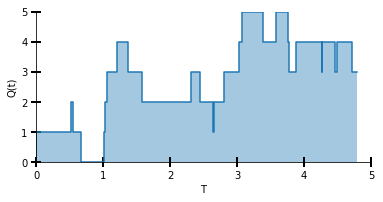

In [0]:
fig, ax = plt.subplots()
plt.step(t, cn)
plt.xlabel('T')
plt.ylabel('Q(t)')
plt.gca().set_aspect(0.45)
plt.fill_between(t, cn, step="pre", alpha=0.4)
plt.xlim([0, 5])
plt.ylim([0, 5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(length=10, width=2, direction='inout')
plt.show()